In [86]:
import pandas as pd
from xgboost import XGBRegressor
import sqlite3
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [87]:
conn = sqlite3.connect('gaokao.db')
cur = conn.cursor()
cur.execute('''
select gk1.year,prov.province,gk1.score,gk1.specialized
from gk1,prov
where gk1.province=prov.province_sx
''')
X = pd.DataFrame(cur.fetchall(), columns=['year', 'province', 'score', 'specialized'])
print(X)

     year  province  score specialized
0    2022       北京市    617          综合
1    2022       天津市    642          综合
2    2022       河北省    611       历史类一批
3    2022       河北省    590       物理类一批
4    2022       山西省    547        文史一批
..    ...       ...    ...         ...
351  2019       青海省    521        理工一批
352  2019   宁夏回族自治区    603        文史一批
353  2019   宁夏回族自治区    555        理工一批
354  2019  新疆维吾尔自治区    586        文史一批
355  2019  新疆维吾尔自治区    568        理工一批

[356 rows x 4 columns]


In [88]:
X_test = X[X['year'] == 2022]
X_train = X[X['year'] != 2022]
print(X_train)
print(X_test)

     year  province  score  specialized
81   2021       北京市    598           综合
82   2021       天津市    637           综合
83   2021       河北省    604        历史类一批
84   2021       河北省    593        物理类一批
85   2021       河北省    589  物理学（中外合作办学）
..    ...       ...    ...          ...
351  2019       青海省    521         理工一批
352  2019   宁夏回族自治区    603         文史一批
353  2019   宁夏回族自治区    555         理工一批
354  2019  新疆维吾尔自治区    586         文史一批
355  2019  新疆维吾尔自治区    568         理工一批

[275 rows x 4 columns]
    year  province  score specialized
0   2022       北京市    617          综合
1   2022       天津市    642          综合
2   2022       河北省    611       历史类一批
3   2022       河北省    590       物理类一批
4   2022       山西省    547        文史一批
..   ...       ...    ...         ...
76  2022   宁夏回族自治区    552        文史一批
77  2022   宁夏回族自治区    513        理工一批
78  2022  新疆维吾尔自治区    534        文史一批
79  2022  新疆维吾尔自治区    516        理工一批
80  2022  新疆维吾尔自治区    479    南疆计划（理工）

[81 rows x 4 columns]


In [89]:
y = X_train['score']
y_test = X_test['score']
X_train = X_train.drop(['score'], axis=1)
X_test = X_test.drop(['score'], axis=1)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
for col in X_train.columns:
    if col not in X_test.columns:
        X_test[col] = 0
for col in X_test.columns:
    if col not in X_train.columns:
        X_train[col] = 0
X_test = X_test[X_train.columns]
print(X_train)
print(X_test)
print(y)
print(y_test)

     year  province_上海市  province_云南省  province_内蒙古自治区  province_北京市  \
81   2021             0             0                0             1   
82   2021             0             0                0             0   
83   2021             0             0                0             0   
84   2021             0             0                0             0   
85   2021             0             0                0             0   
..    ...           ...           ...              ...           ...   
351  2019             0             0                0             0   
352  2019             0             0                0             0   
353  2019             0             0                0             0   
354  2019             0             0                0             0   
355  2019             0             0                0             0   

     province_吉林省  province_四川省  province_天津市  province_宁夏回族自治区  province_安徽省  \
81              0             0             0         

In [90]:
model = XGBRegressor(n_estimators=500)
model.fit(X_train, y,eval_set=[(X_test, y_test)], verbose=False)
y_pred = model.predict(X_test)
print(y_pred)
print(mean_absolute_error(y_pred, y_test))

[598.0022  637.00037 603.99756 592.9984  603.99194 579.0093  553.0021
 549.0612  571.00757 546.9387  528.0008  600.0053  571.0047  571.0204
 555.99396 538.9819  547.0048  525.9931  539.00836 579.03094 563.9818
 555.02484 566.9976  531.99756 542.00037 600.00073 589.0005  633.98895
 634.96405 619.0024  623.0203  594.0197  599.99976 612.00006 589.98553
 622.943   613.99713 611.041   595.0187  580.00055 630.93713 610.0119
 626.03485 604.0097  612.03455 591.99646 631.9965  617.0016  614.00146
 605.0013  612.0019  604.99805 606.9984  613.9491  586.0441  665.00226
 620.00354 614.0034  603.0259  625.95636 594.9955  642.9725  575.02856
 643.9612  580.0358  598.9974  433.0004  565.99976 379.00073 610.0056
 572.97125 519.02356 585.01794 557.98926 531.0318  504.95993 588.0001
 486.0125  572.02014 544.99    550.4301 ]
20.623454529562114


In [91]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model1.fit(X_train, y)
y_pred1 = model1.predict(X_test)
print(y_pred1)
print(mean_absolute_error(y_pred1, y_test))

[601.74       630.19       606.35       601.49       600.91
 587.38       562.41       561.65       563.79       550.7
 535.27       596.08       579.66       562.64       552.46
 545.51       547.08       533.52       544.99       575.93
 563.78       568.34       564.64       543.46       542.06
 571.72       573.96       632.32333333 629.05       618.37
 618.92       595.18       603.01       608.44       583.82
 619.62       613.02       610.43       598.14       591.16
 624.93       613.88       621.68       600.93       612.82
 602.22       623.35       613.         612.67       607.37
 611.48       605.26       606.36       609.64       591.83
 675.85       615.9        614.01       608.08       620.3
 596.15       634.08       587.35       631.96       597.66
 595.97       479.94       577.85       458.35       609.46
 576.04       539.11       592.17       566.44       536.31
 507.93       572.89       521.7        570.34       553.58
 559.86      ]
22.161893004115225


In [92]:
import catboost as cb
model2 = cb.CatBoostRegressor()
model2.fit(X_train, y)
y_pred2 = model2.predict(X_test)
print(y_pred2)
print(mean_absolute_error(y_pred2, y_test))

Learning rate set to 0.033388
0:	learn: 47.6778895	total: 1.13ms	remaining: 1.13s
1:	learn: 47.3346509	total: 1.39ms	remaining: 692ms
2:	learn: 47.0354520	total: 2.01ms	remaining: 668ms
3:	learn: 46.6519479	total: 2.63ms	remaining: 655ms
4:	learn: 46.1276617	total: 3.21ms	remaining: 639ms
5:	learn: 45.7573370	total: 3.72ms	remaining: 616ms
6:	learn: 45.3004304	total: 4.13ms	remaining: 585ms
7:	learn: 44.8342479	total: 4.74ms	remaining: 588ms
8:	learn: 44.4893059	total: 5.37ms	remaining: 592ms
9:	learn: 44.0995385	total: 5.9ms	remaining: 584ms
10:	learn: 43.6844597	total: 6.39ms	remaining: 575ms
11:	learn: 43.3847647	total: 6.93ms	remaining: 571ms
12:	learn: 43.1084663	total: 7.46ms	remaining: 566ms
13:	learn: 42.6701173	total: 8.11ms	remaining: 571ms
14:	learn: 42.3285211	total: 8.67ms	remaining: 569ms
15:	learn: 41.9763475	total: 9.05ms	remaining: 556ms
16:	learn: 41.5784197	total: 9.65ms	remaining: 558ms
17:	learn: 41.3025611	total: 10.3ms	remaining: 560ms
18:	learn: 41.0906523	total

In [93]:
df1 = pd.concat([X[X['year']==2022].drop('score',axis=1), y_test], axis=1)
df1 = pd.concat([df1, pd.DataFrame(y_pred,columns=['pre_score'])], axis=1)
print(df1)
df1.to_csv('./gk1.csv', index=False)

    year  province specialized  score   pre_score
0   2022       北京市          综合    617  598.002197
1   2022       天津市          综合    642  637.000366
2   2022       河北省       历史类一批    611  603.997559
3   2022       河北省       物理类一批    590  592.998413
4   2022       山西省        文史一批    547  603.991943
..   ...       ...         ...    ...         ...
76  2022   宁夏回族自治区        文史一批    552  588.000122
77  2022   宁夏回族自治区        理工一批    513  486.012512
78  2022  新疆维吾尔自治区        文史一批    534  572.020142
79  2022  新疆维吾尔自治区        理工一批    516  544.989990
80  2022  新疆维吾尔自治区    南疆计划（理工）    479  550.430115

[81 rows x 5 columns]


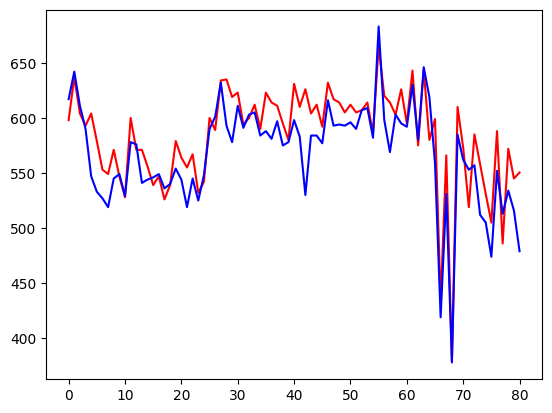

<Figure size 640x480 with 0 Axes>

In [94]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(0, 81), y_pred, 'r')
plt.plot(np.arange(0, 81), y_test, 'b')
plt.show()
plt.savefig('./xgboost.svg')

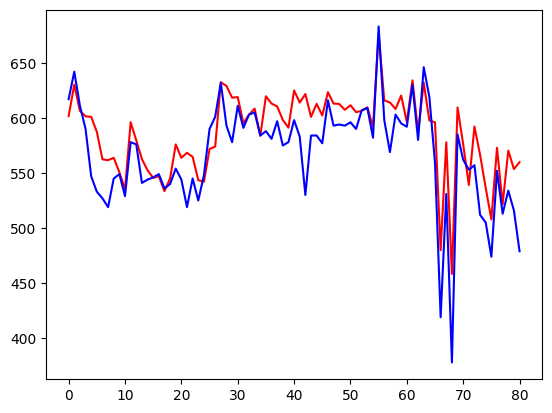

In [95]:
plt.plot(np.arange(0, 81), y_pred1, 'r')
plt.plot(np.arange(0, 81), y_test, 'b')
plt.show()

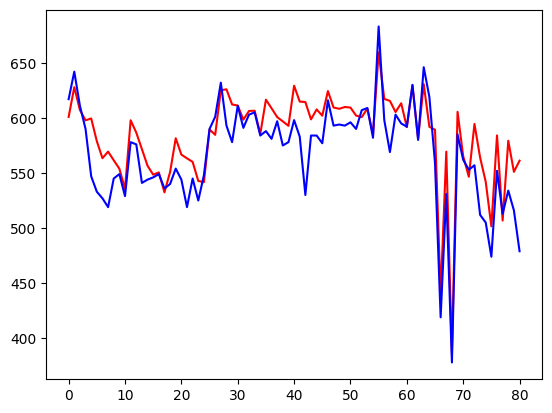

In [96]:
plt.plot(np.arange(0, 81), y_pred2, 'r')
plt.plot(np.arange(0, 81), y_test, 'b')
plt.show()

In [97]:
import pyecharts.options as opts
from pyecharts.charts import Map
def visual(df, year, specialized):
    c = (
        Map()
        .add("XGboost高考分数", [list(z) for z in zip(df['province'], df['def'])], "china")
        .set_global_opts(
            title_opts=opts.TitleOpts(title="{}{}高考分数".format(year, specialized)),
            visualmap_opts=opts.VisualMapOpts(max_=100, min_=0),
        )
    )
    c.render('./xgboost_map.html')


In [98]:
specializeds = cur.execute('''
select specialized
from gk1
where year = 2022
group by specialized
order by count(*) desc
''')
specializeds = [l[0] for l in specializeds]
l1 = [0, 2]
q_specialized = tuple([specializeds[i] for i in l1])
q_specialized

('理工一批', '物理类一批')

In [99]:
x_visual = X[X['year'] == 2022]

x_visual['def'] = abs(y_pred - x_visual['score'])
x_visual = x_visual[x_visual['specialized'].isin(q_specialized)]

visual(x_visual, 2022, q_specialized)


F:\Program\AI\miniconda\envs\Py_hw\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [100]:
print(y_pred)
X_test

[598.0022  637.00037 603.99756 592.9984  603.99194 579.0093  553.0021
 549.0612  571.00757 546.9387  528.0008  600.0053  571.0047  571.0204
 555.99396 538.9819  547.0048  525.9931  539.00836 579.03094 563.9818
 555.02484 566.9976  531.99756 542.00037 600.00073 589.0005  633.98895
 634.96405 619.0024  623.0203  594.0197  599.99976 612.00006 589.98553
 622.943   613.99713 611.041   595.0187  580.00055 630.93713 610.0119
 626.03485 604.0097  612.03455 591.99646 631.9965  617.0016  614.00146
 605.0013  612.0019  604.99805 606.9984  613.9491  586.0441  665.00226
 620.00354 614.0034  603.0259  625.95636 594.9955  642.9725  575.02856
 643.9612  580.0358  598.9974  433.0004  565.99976 379.00073 610.0056
 572.97125 519.02356 585.01794 557.98926 531.0318  504.95993 588.0001
 486.0125  572.02014 544.99    550.4301 ]


,year,province_上海市,province_云南省,province_内蒙古自治区,province_北京市,province_吉林省,province_四川省,province_天津市,province_宁夏回族自治区,province_安徽省,...,specialized_理工一批,specialized_综合,specialized_综合改革,specialized_西藏民（文史）,specialized_西藏民（理工）,specialized_西藏汉（文史）,specialized_西藏汉（理工）,specialized_软件单列,specialized_软件单列（理工）,specialized_南疆计划（理工）
0,2022,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2022,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2022,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
77,2022,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
78,2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,2022,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [101]:
print(X[X['year']==2022])

    year  province  score specialized
0   2022       北京市    617          综合
1   2022       天津市    642          综合
2   2022       河北省    611       历史类一批
3   2022       河北省    590       物理类一批
4   2022       山西省    547        文史一批
..   ...       ...    ...         ...
76  2022   宁夏回族自治区    552        文史一批
77  2022   宁夏回族自治区    513        理工一批
78  2022  新疆维吾尔自治区    534        文史一批
79  2022  新疆维吾尔自治区    516        理工一批
80  2022  新疆维吾尔自治区    479    南疆计划（理工）

[81 rows x 4 columns]


In [102]:
x_visual

,year,province,score,specialized,def
3,2022,河北省,590,物理类一批,2.998413
5,2022,山西省,533,理工一批,46.009277
9,2022,内蒙古自治区,549,理工一批,2.061279
12,2022,辽宁省,576,物理类一批,4.995300
15,2022,吉林省,546,理工一批,7.018127
21,2022,黑龙江省,519,理工一批,36.024841
26,2022,江苏省,601,物理类一批,11.999512
30,2022,安徽省,611,理工一批,12.020325
33,2022,福建省,605,物理类一批,7.000061
37,2022,江西省,597,理工一批,14.041016


In [103]:
# 同样的方法预测2022的rank

In [104]:
conn=sqlite3.connect('gaokao.db')
cur=conn.cursor()
cur.execute('''
select gk1.year,prov.province,gk1.rank,gk1.specialized
from gk1,prov
where gk1.province=prov.province_sx and rank is not 0 and rank is not null and rank != ''
and rank not like '—'
''')
X=pd.DataFrame(cur.fetchall(),columns=['year','province','rank','specialized'])
print(X)

     year province   rank specialized
0    2022      北京市   6380          综合
1    2022      天津市   6198          综合
2    2022      河北省   1225       历史类一批
3    2022      河北省  14004       物理类一批
4    2022      山西省   2625        文史一批
..    ...      ...    ...         ...
330  2019      甘肃省   4472        理工一批
331  2019      青海省    463        文史一批
332  2019      青海省   1838        理工一批
333  2019  宁夏回族自治区    426        文史一批
334  2019  宁夏回族自治区   2040        理工一批

[335 rows x 4 columns]


In [105]:
X_test = X[X['year'] == 2022]
X_train = X[X['year'] != 2022]
print(X_train)
print(X_test)

     year province   rank  specialized
74   2021      北京市   8278           综合
75   2021      天津市   6259           综合
76   2021      河北省   2097        历史类一批
77   2021      河北省  16515        物理类一批
78   2021      河北省  18507  物理学（中外合作办学）
..    ...      ...    ...          ...
330  2019      甘肃省   4472         理工一批
331  2019      青海省    463         文史一批
332  2019      青海省   1838         理工一批
333  2019  宁夏回族自治区    426         文史一批
334  2019  宁夏回族自治区   2040         理工一批

[261 rows x 4 columns]
    year province   rank specialized
0   2022      北京市   6380          综合
1   2022      天津市   6198          综合
2   2022      河北省   1225       历史类一批
3   2022      河北省  14004       物理类一批
4   2022      山西省   2625        文史一批
..   ...      ...    ...         ...
69  2022      甘肃省  10354        理工一批
70  2022      青海省    629        文史一批
71  2022      青海省   2522        理工一批
72  2022  宁夏回族自治区    456        文史一批
73  2022  宁夏回族自治区   2322        理工一批

[74 rows x 4 columns]


In [106]:
y = X_train['rank']
# 类型转换
y_test = X_test['rank']
X_train = X_train.drop(['rank'], axis=1)
X_test = X_test.drop(['rank'], axis=1)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
for col in X_train.columns:
    if col not in X_test.columns:
        X_test[col] = 0
for col in X_test.columns:
    if col not in X_train.columns:
        X_train[col] = 0
X_test = X_test[X_train.columns]
print(X_train)
print(X_test)
print(y)
print(y_test)

     year  province_上海市  province_云南省  province_内蒙古自治区  province_北京市  \
74   2021             0             0                0             1   
75   2021             0             0                0             0   
76   2021             0             0                0             0   
77   2021             0             0                0             0   
78   2021             0             0                0             0   
..    ...           ...           ...              ...           ...   
330  2019             0             0                0             0   
331  2019             0             0                0             0   
332  2019             0             0                0             0   
333  2019             0             0                0             0   
334  2019             0             0                0             0   

     province_吉林省  province_四川省  province_天津市  province_宁夏回族自治区  province_安徽省  \
74              0             0             0         

In [107]:
y_test

0      6380
1      6198
2      1225
3     14004
4      2625
      ...  
69    10354
70      629
71     2522
72      456
73     2322
Name: rank, Length: 74, dtype: int64

In [108]:
model = XGBRegressor(n_estimators=500)
model.fit(X_train, y,eval_set=[(X_test, y_test)], verbose=False)
y_pred = model.predict(X_test)
print(y_pred)

[ 8277.962    6258.945    2096.996   16515.076     766.7395   8297.878
 15177.0205   2516.9863   1401.0232   6787.8145   9330.099    2436.0408
 18355.354    1044.4764   1573.7305   8428.41     7335.579   10273.597
  8431.144     956.206    1426.4025   7172.8867   5639.2393  10554.127
  6985.0127   1651.151   12546.261   15137.007    1076.8643   2699.093
  7035.175   16511.814    1229.7769   6711.076   12831.142    1085.9441
  1800.415    6083.8105  10086.896   30103.87     1608.9573   4672.159
 11698.053   23232.158   18359.084   31893.137    9453.959    1835.0339
 11211.664    1283.8146   8112.662    2519.5146  19402.754     742.3949
  6694.044    3069.0198   1099.6849  10365.045    1719.1774   9415.465
 23348.041     546.41547  5445.771     551.7972  12671.676     823.9472
  9074.225   22660.607     656.6644   4597.952     438.33865  1685.3645
   377.2347   4209.1353 ]


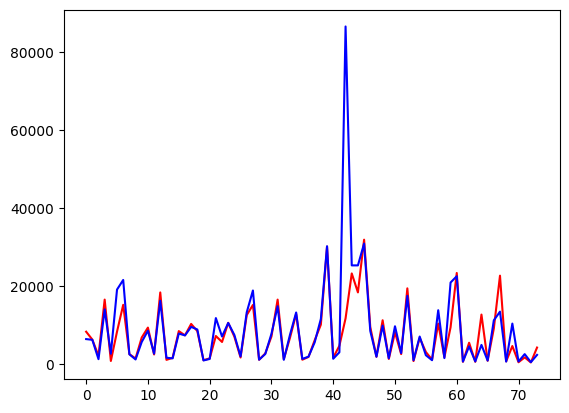

2550.870650007918


In [109]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(0, 74), y_pred, 'r')
plt.plot(np.arange(0, 74), y_test, 'b')
plt.show()
print(mean_absolute_error(y_pred, y_test))

In [110]:
model1 = RandomForestRegressor()
model1.fit(X_train, y)
y_pred1 = model1.predict(X_test)
print(y_pred1)
print(mean_absolute_error(y_pred1, y_test))

[ 7814.82   6540.23   2024.95  14351.33    815.29   7717.73  15508.16
  1821.55   1513.12   6592.43  10918.88   2396.32  15327.72   1067.1
  1749.51   8092.98   7098.3   11346.64   9366.28    926.99   1550.33
  6947.08   6439.91  11364.2    7481.8    1962.04  12417.59  14328.086
  1027.44   2193.03   7158.12  16621.41   1372.87   9086.3   13749.34
  1035.27   1703.95   6351.5   10286.87  26489.05   1604.42   6890.04
 12250.06  19002.59  18940.04  21160.    10333.94   1727.5   11606.16
  1489.8   10520.2    4243.33  17491.82    789.1    7045.64   3781.24
  1362.77  11674.4    1612.78  10900.71  19324.79    589.79   5394.56
   658.07  10108.05    871.2    9090.19  18360.08    636.02   4713.93
   445.94   2218.78    401.09   3846.24 ]
2707.0382972972975


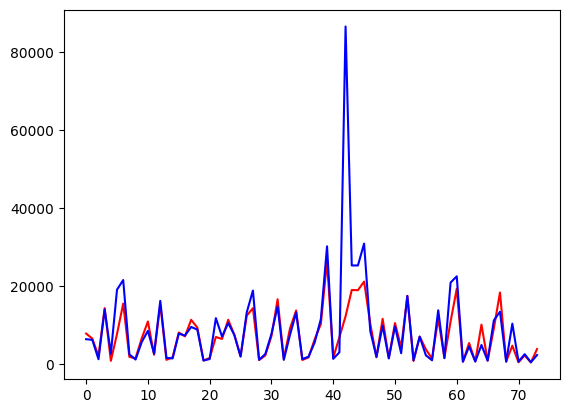

In [111]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(0, 74), y_pred1, 'r')
plt.plot(np.arange(0, 74), y_test, 'b')
plt.show()

In [112]:
import catboost as cb
model2 = cb.CatBoostRegressor()
model2.fit(X_train, y)
y_pred2 = model2.predict(X_test)
print(y_pred2)
print(mean_absolute_error(y_pred2, y_test))

Learning rate set to 0.033114
0:	learn: 8552.0206171	total: 714us	remaining: 714ms
1:	learn: 8453.6883814	total: 1.36ms	remaining: 680ms
2:	learn: 8352.7530176	total: 1.78ms	remaining: 592ms
3:	learn: 8260.3873054	total: 2.32ms	remaining: 577ms
4:	learn: 8167.3338414	total: 2.81ms	remaining: 559ms
5:	learn: 8073.2658715	total: 3.29ms	remaining: 545ms
6:	learn: 7990.5630129	total: 3.82ms	remaining: 542ms
7:	learn: 7914.0341861	total: 4.36ms	remaining: 541ms
8:	learn: 7824.9795800	total: 4.91ms	remaining: 541ms
9:	learn: 7753.6222879	total: 5.49ms	remaining: 544ms
10:	learn: 7690.1827732	total: 6.01ms	remaining: 541ms
11:	learn: 7615.6995369	total: 6.55ms	remaining: 540ms
12:	learn: 7552.6372520	total: 7.04ms	remaining: 534ms
13:	learn: 7482.2524784	total: 7.55ms	remaining: 532ms
14:	learn: 7433.9487490	total: 7.82ms	remaining: 514ms
15:	learn: 7385.6600225	total: 8.2ms	remaining: 504ms
16:	learn: 7325.8852514	total: 8.71ms	remaining: 504ms
17:	learn: 7256.2147119	total: 9.2ms	remaining: